# Success Prediction for Airbnb Listings

# 1. Introduction

A real dataset with listing characteristics and reviews for over 38,000 Airbnb listings in New York City are explored, processed, and utilized to train a Supervised Machine Learning model to predict success probability of a listing. Success is measured by user review ratings. Data exploration and model interpretation findings provide actionable insights for Airbnb to increase listing success, as well as profitability.

# 2. Data Overview

### 2.1 Data References and Import

The datasets used were obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data/), published by Murray Cox.

Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import matplotlib.gridspec
import json

Importing Datasets:

In [2]:
df_listings = pd.read_csv('listings.csv', low_memory=False)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38277 non-null  int64  
 1   listing_url                                   38277 non-null  object 
 2   scrape_id                                     38277 non-null  int64  
 3   last_scraped                                  38277 non-null  object 
 4   name                                          38264 non-null  object 
 5   description                                   37085 non-null  object 
 6   neighborhood_overview                         22650 non-null  object 
 7   picture_url                                   38277 non-null  object 
 8   host_id                                       38277 non-null  int64  
 9   host_url                                      38277 non-null 

The "df_listings" dataset contains missing values, as shown above. Null data will either be omitted, imputed using summary statistics, or estimated through a machine learning model.

Certain features of Dataframe "df_listings" will be omitted since they do not provide information to predict the success of a listing.

In [3]:
df_listings = df_listings.drop(['listing_url','scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_name', 
                  'host_thumbnail_url', 'host_picture_url', 'neighbourhood', 'bathrooms', 'calendar_updated', 
                  'calendar_last_scraped', 'license'], axis=1)
df_listings.head(3)

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,...,4.76,4.79,4.86,4.41,f,3,3,0,0,0.33
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,a few days or more,9%,...,4.78,4.80,4.71,4.64,f,1,1,0,0,4.86
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within an hour,100%,...,4.91,4.91,4.47,4.52,f,2,0,2,0,0.52


In [4]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891964 entries, 0 to 891963
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     891964 non-null  int64 
 1   id             891964 non-null  int64 
 2   date           891964 non-null  object
 3   reviewer_id    891964 non-null  int64 
 4   reviewer_name  891958 non-null  object
 5   comments       891078 non-null  object
dtypes: int64(3), object(3)
memory usage: 40.8+ MB


The "df_reviews" dataset contains missing values, as shown above. Null data will either be omitted, imputed using summary statistics, or estimated through a machine learning model.

Certain features of Dataframe "df_reviews" will be omitted since they do not provide information to predict the success of a listing.

In [5]:
df_reviews = df_reviews.drop('reviewer_name', axis=1)
df_reviews.head(3)

,listing_id,id,date,reviewer_id,comments
0,2595,17857,2009-11-21,50679,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Great experience.
2,2595,19760,2009-12-10,38960,I've stayed with my friend at the Midtown Cast...


### 2.2 Summary Statistics

In [6]:
df_listings.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.827700e+04,3.827700e+04,38243.000000,38243.000000,38277.000000,38277.000000,38277.000000,34302.000000,35872.000000,38277.000000,...,28172.000000,28154.000000,28165.000000,28151.000000,28150.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000
mean,2.962239e+07,1.148305e+08,49.020056,49.020056,40.729206,-73.948967,2.792094,1.323567,1.593527,21.623769,...,4.612408,4.813884,4.807454,4.750307,4.646892,17.747655,8.042637,9.593934,0.047966,1.721019
std,1.742239e+07,1.299194e+08,312.947661,312.947661,0.055752,0.050759,1.869736,0.708327,1.078893,29.573333,...,0.575452,0.439260,0.465544,0.416101,0.518905,59.150451,34.977178,43.310123,0.426789,4.399826
min,2.595000e+03,2.438000e+03,0.000000,0.000000,40.504560,-74.249840,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.341048e+07,1.139462e+07,1.000000,1.000000,40.689260,-73.983270,2.000000,1.000000,1.000000,3.000000,...,4.500000,4.800000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,3.081269e+07,5.005297e+07,1.000000,1.000000,40.725180,-73.954770,2.000000,1.000000,1.000000,30.000000,...,4.800000,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.480000
75%,4.642855e+07,2.002395e+08,3.000000,3.000000,40.762680,-73.930430,4.000000,1.000000,2.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.780000
max,5.366510e+07,4.344080e+08,3750.000000,3750.000000,40.914020,-73.710870,16.000000,16.000000,24.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000


# 3. Data Exploration

This section presents an exploratory analysis of the target variable (Rating), and the listings' characteristic features. The distribution of each feature as well as the variance of the Rating probability per the feature values are obtained and evaluated through analytics, graphs, and decision trees as required. Preliminary conclusions are reached about the relationship between the features and the Ratings.

### 3.1 Target Variable: Rating

In [7]:
df_listings['review_scores_rating'].value_counts(bins=5)

(4.0, 5.0]       25777
(3.0, 4.0]        1722
(-0.006, 1.0]      786
(2.0, 3.0]         386
(1.0, 2.0]         102
Name: review_scores_rating, dtype: int64

In [8]:
df_listings['review_scores_rating'].describe()

count    28773.000000
mean         4.585140
std          0.835918
min          0.000000
25%          4.570000
50%          4.820000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

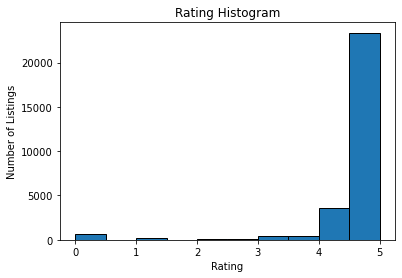

In [9]:
plt.hist(df_listings['review_scores_rating'], edgecolor="black", bins=10)
plt.title('Rating Histogram')
plt.ylabel('Number of Listings')
plt.xlabel('Rating')
plt.show()

Most of the Ratings fall within the 4.5 to 5 range, which is the highest end of the Ratings range (0-5).

### 3.2 Listing ID

In [10]:
df_listings['id'].nunique(), len(df_listings)

(38277, 38277)

The Listing IDs in the "df_listings" dataset are confirmed to be unique.

### 3.3 Borough

Below is an exploration of the Borough Location feature of the listings, and summaraizes the total number of listings per Borough, their portion within the dataset, the average nightly price, and the Rating probability.

The prices per night are converted from strings to float values below.

In [11]:
df_listings['price'] = df_listings['price'].str.replace('$','').str.replace(',','').astype(float)

/tmp/ipykernel_53/1918718231.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['price'] = df_listings['price'].str.replace('$','').str.replace(',','').astype(float)


In [12]:
borough = pd.DataFrame()
borough['Listings'] = df_listings.groupby('neighbourhood_group_cleansed').count()['id']
borough['Listing_Portion'] = (borough['Listings']/len(df_listings)).round(2)
borough['Average_Price'] = (df_listings.groupby('neighbourhood_group_cleansed').mean()['price']).round(0)
borough['Average_Rating'] = (df_listings.groupby('neighbourhood_group_cleansed').mean()['review_scores_rating']).round(2)
borough=borough.reset_index()
borough = borough.rename(columns = {'neighbourhood_group_cleansed': 'Borough'})
borough

,Borough,Listings,Listing_Portion,Average_Price,Average_Rating
0,Bronx,1104,0.03,106.0,4.59
1,Brooklyn,14716,0.38,137.0,4.62
2,Manhattan,16781,0.44,223.0,4.55
3,Queens,5323,0.14,119.0,4.59
4,Staten Island,353,0.01,115.0,4.74


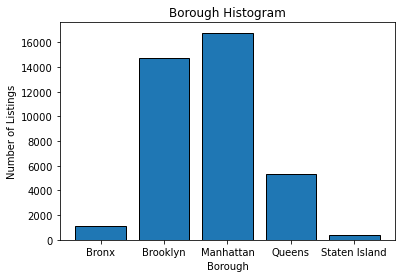

In [13]:
plt.bar(borough['Borough'], borough['Listings'], edgecolor="black")
plt.title('Borough Histogram')
plt.ylabel('Number of Listings')
plt.xlabel('Borough')
plt.show()

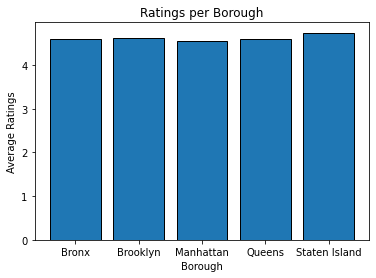

In [14]:
plt.bar(borough['Borough'], borough['Average_Rating'], edgecolor="black")
plt.title('Ratings per Borough')
plt.ylabel('Average Ratings')
plt.xlabel('Borough')
plt.show()

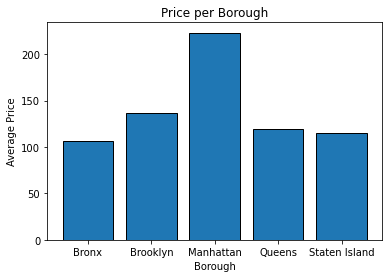

In [15]:
plt.bar(borough['Borough'], borough['Average_Price'], edgecolor="black")
plt.title('Price per Borough')
plt.ylabel('Average Price')
plt.xlabel('Borough')
plt.show()

There are a few observations that could be made from the data:
- Manhattan is the borough with the largest portion of listings, followed by Brooklyn.
- Manhattan has the lowest Average Ratings, which fall below the mean. Staten Island has the highest Average Ratings.
- Manhattan has the largest Average Price, followed by Brooklyn.

### 3.4 Additional Features

Some of the features in the dataset are numerical, while others are categorical. Some features must be converted to numerical data. Below, the data is reformatted and sorted as appropriate.

#### 3.4.1 Numerical Features

The number of bathrooms are converted from strings to float values, assuming 'half' baths are the equivalent of 0.5 bathrooms. Shared bathrooms are multiplied by 0.5.

In [16]:
df_listings['bathrooms'] = (df_listings['bathrooms_text'].str.replace('baths','').str.replace('bath','')
                                 .str.replace('Private','').str.replace('private','').str.replace('Half-','0.5')
                                 .str.replace('half-','0.5').str.replace('1 shared','0.5').str.replace('Shared 0.5','0.25')
                                 .str.replace('1.5 shared','0.75').str.replace('2 shared','1').str.replace('0 shared','0')
                                 .str.replace('2.5 shared','1.25').str.replace('3 shared','1.5').str.replace('4 shared','2')
                                 .str.replace('3.5 shared','1.75').str.replace('4.5 shared','2.25')
                                 .str.replace('6 shared','3')).astype(float)

/tmp/ipykernel_53/3318431184.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['bathrooms'] = (df_listings['bathrooms_text'].str.replace('baths','').str.replace('bath','')


Host Response time is converted from strings to float values below, using approximated times in days.

Host Response rates and Acceptance rates are converted to float values.

In [17]:
df_listings['host_response_time'] = (df_listings['host_response_time'].str.replace('within a day', '1')
                                     .str.replace('a few days or more', '3').str.replace('within an hour', '0.0417')
                                     .str.replace('within a few hours', '0.125')).astype(float)

df_listings['host_response_rate'] = (df_listings['host_response_rate'].str.replace('%','')).astype(float)/100

df_listings['host_acceptance_rate'] = (df_listings['host_acceptance_rate'].str.replace('%','')).astype(float)/100

The length of time that a host has hosted on Airbnb is found below, using time in years.
Similarly, the length of time since the listing's first review and last review are also found.

In [18]:
df_listings['host_since'] = ((pd.Timestamp.now() - df_listings['host_since'].astype('datetime64[ns]'))/np.timedelta64(1, 'Y')).round(1)

df_listings['first_review'] = ((pd.Timestamp.now() - df_listings['first_review'].astype('datetime64[ns]'))/np.timedelta64(1, 'Y')).round(1)

df_listings['last_review'] = ((pd.Timestamp.now() - df_listings['last_review'].astype('datetime64[ns]'))/np.timedelta64(1, 'Y')).round(1)

#### 3.4.2 Categorical Features

Categorical features must be encoded in a suitable format, i.e. as numerical data. 

In [19]:
#(df_listings['host_is_superhost'].unique(), df_listings['host_has_profile_pic'].unique(), 
#df_listings['host_identity_verified'].unique(), df_listings['has_availability'].unique(), 
#df_listings['instant_bookable'].unique(), #df_listings['neighbourhood_cleansed'].unique(), 
#df_listings['neighbourhood_group_cleansed'].unique(), df_listings['room_type'].unique())

For features where the data is catagorized into 'true' or 'false', Ordinal Encoding will be used to assign numbers to each value.

In [20]:
df_listings['host_is_superhost'] = (df_listings['host_is_superhost'].str.replace('t','1').str.replace('f','0')).astype(float)
df_listings['host_has_profile_pic'] = (df_listings['host_has_profile_pic'].str.replace('t','1').str.replace('f','0')).astype(float)
df_listings['host_identity_verified'] = (df_listings['host_identity_verified'].str.replace('t','1').str.replace('f','0')).astype(float)
df_listings['has_availability'] = (df_listings['has_availability'].str.replace('t','1').str.replace('f','0')).astype(float)
df_listings['instant_bookable'] = (df_listings['instant_bookable'].str.replace('t','1').str.replace('f','0')).astype(float)

For categorical variables, One-Hot Encoding will be used.

Latitude and Longitude pairs will be transformed into distances from specific landmarks.

Below, the catergorical columns are sorted based on how they will be encoded.

In [21]:
ordinal_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                'has_availability', 'instant_bookable']

categorical_cols = ['neighbourhood_group_cleansed', 'room_type']

distance_cols = ['latitude','longitude']

#### 3.4.3 All Features

Below is a summary of all features that will be analyzed, sorted into categorical and numerical columns below.

In [22]:
ordinal_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                'has_availability', 'instant_bookable']

categorical_cols = ['neighbourhood_group_cleansed', 'room_type']

distance_cols = ['latitude','longitude']

numerical_cols = ['host_since', 'host_response_time', 'host_response_rate','host_acceptance_rate',
                  'host_listings_count', 'accommodates','bathrooms','bedrooms','beds','price',
                  'minimum_nights', 'availability_30', 'availability_365','number_of_reviews',
                  'number_of_reviews_ltm', 'number_of_reviews_l30d','first_review', 'last_review',
                  'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                  'review_scores_communication', 'review_scores_location', 'review_scores_value',
                  'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                  'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                  'reviews_per_month']

Below is an exploration of how different numerical features affect the Rating of a listing.

In [23]:
X = df_listings[numerical_cols+ordinal_cols]
y = df_listings['review_scores_rating']

In [24]:
from ipywidgets import widgets

def scatter_plot(column):
    plt.plot(X[column], y, 'k.')
    plt.xlabel(column)
    plt.ylabel('Rating')
    plt.title('Rating vs {}'.format(column))

widgets.interact(scatter_plot, column=X.columns);

interactive(children=(Dropdown(description='column', options=('host_since', 'host_response_time', 'host_respon…

# 4. Machine Learning Model

Importing Scikit-Learn libraries:

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,cross_val_score

Next, the null values associated with the Ratings rows will be dropped.

In [26]:
df_listings = df_listings.dropna(subset=['review_scores_rating'])
df_listings.shape 

(28773, 62)

Outliers will also be dropped.

In [27]:
df_listings = df_listings[df_listings['price']<8000]
df_listings = df_listings[df_listings['minimum_nights']<366]
df_listings = df_listings[df_listings['number_of_reviews']<800]
df_listings.shape

(28754, 62)

### 4.1 Full Features Model, Imputed using Median

In [28]:
X = df_listings[numerical_cols+ordinal_cols]
y = df_listings['review_scores_rating']

In [29]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

lin_scaled_imp_model = Pipeline([('imp_median', imp_median), ('std_scaler', StandardScaler()), ('lr', LinearRegression())])
lin_scaled_imp_model.fit(X,y)
lin_scaled_imp_model.score(X,y)

0.2816150653644749

### 4.2 Full Features Model, Imputed using Decision Tree

In [30]:
X_full = df_listings[ordinal_cols + numerical_cols]

In [31]:
#Imputer
full_model = Pipeline(steps=[('scale', StandardScaler()),
                                ('dtr', DecisionTreeRegressor(random_state=42))
                               ])

X_full_copy = X_full[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'host_since', 
               'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
               'bathrooms', 'bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness', 
               'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
               'review_scores_value', 'has_availability', 'instant_bookable', 'accommodates', 'price', 
               'minimum_nights', 'availability_30', 'availability_365', 
               'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
               'last_review', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
               'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
               'reviews_per_month']].copy()

X_full_col  = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'host_since', 
               'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
               'bathrooms', 'bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness', 
               'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
               'review_scores_value']

for col in X_full_col: 
    X=X_full_copy[['has_availability', 'instant_bookable',  
                   'accommodates', 'price', 'minimum_nights', 'availability_30', 'availability_365', 
                   'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
                   'last_review', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'reviews_per_month', col]].copy()
    missing = X[X[col].isna()]
    X = X[~X[col].isna()]
    Y = X.pop(col)
    full_model.fit(X,Y)
    predicted_col = pd.Series(full_model.predict(missing[['has_availability', 'instant_bookable', 'accommodates', 'price', 'minimum_nights', 
                                                          'availability_30', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 
                                                          'number_of_reviews_l30d', 'first_review', 'last_review', 'calculated_host_listings_count', 
                                                          'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                                                          'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]),index=missing.index)
    X_full.loc[missing.index,col] = predicted_col

/opt/conda/envs/data3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/envs/data3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/envs/data3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

#### 4.2.1 Linear Regression Model

In [32]:
full_model = Pipeline([('std_scaler', StandardScaler()), 
                       ('lr', LinearRegression())])
full_model.fit(X_full, y)
full_model.score(X_full,y)

0.3609646627461325

#### 4.2.2 Ridge Model

In [33]:
ridge = Ridge()
ridge.fit(X_full, y)
ridge.score(X_full,y)

0.36096465945529943

#### 4.2.3 Polynomial Model

In [34]:
poly_pipeline = Pipeline([('polynomial_trans', PolynomialFeatures(2)), ('ridge', Ridge())])
poly_pipeline.fit(X_full, y)
poly_pipeline.score(X_full,y)

/opt/conda/envs/data3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.62789e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.4402005258510303

#### 4.2.4 Decision Tree Models

In [35]:
est_2 = DecisionTreeRegressor(max_depth=2)
est_2.fit(X_full, y)
est_2.score(X_full,y)

0.2796815898672067

In [36]:
est_6 = DecisionTreeRegressor(max_depth=6)
est_6.fit(X_full, y)
est_6.score(X_full,y)

0.47020092993200424

In [37]:
est_20 = DecisionTreeRegressor(max_depth=20)
est_20.fit(X_full, y)
est_20.score(X_full,y)

0.9225607582143799

#### 4.2.5 Correlations

<AxesSubplot:>

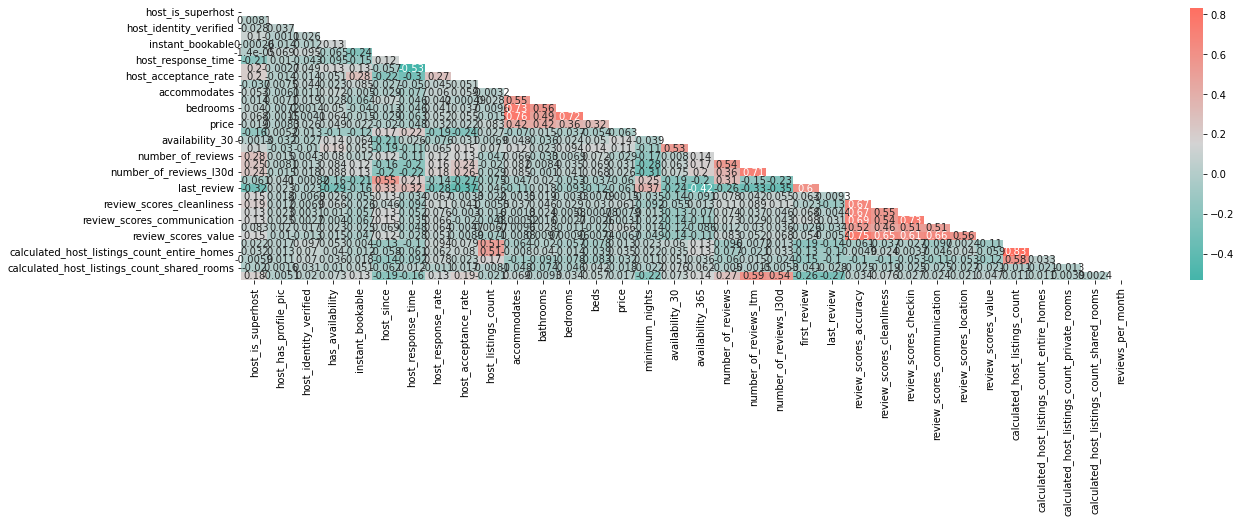

In [38]:
colors = ["#45b5aa","lightgray", "#ff6f61"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
plt.figure(figsize=(20,5))
X_full_copy=X_full.copy()              

mask = np.zeros_like(X_full_copy.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X_full_copy.corr(),cmap=cmap,mask=mask, annot=True)

In [39]:
from sklearn.model_selection import train_test_split
X = X_full
y = df_listings['review_scores_rating']

X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
y.value_counts(normalize = True)

5.00    0.303088
4.00    0.041490
4.50    0.038395
4.67    0.031404
4.75    0.025318
          ...   
3.95    0.000035
3.17    0.000035
3.30    0.000035
2.89    0.000035
3.64    0.000035
Name: review_scores_rating, Length: 156, dtype: float64

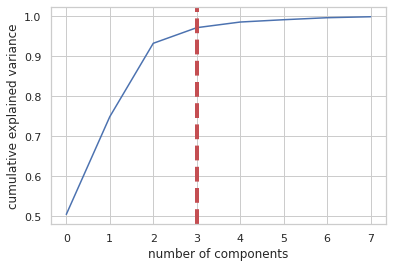

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.505182,0.505182
1,0.749144,0.243961
2,0.932495,0.183352
3,0.971489,0.038994
4,0.985585,0.014096
5,0.991367,0.005782
6,0.996386,0.005020
7,0.998795,0.002409


In [41]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=8)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=3, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

display(pca_df.head(9))

In [42]:
pca = PCA(n_components=34)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

### 4.3 Feature Importance

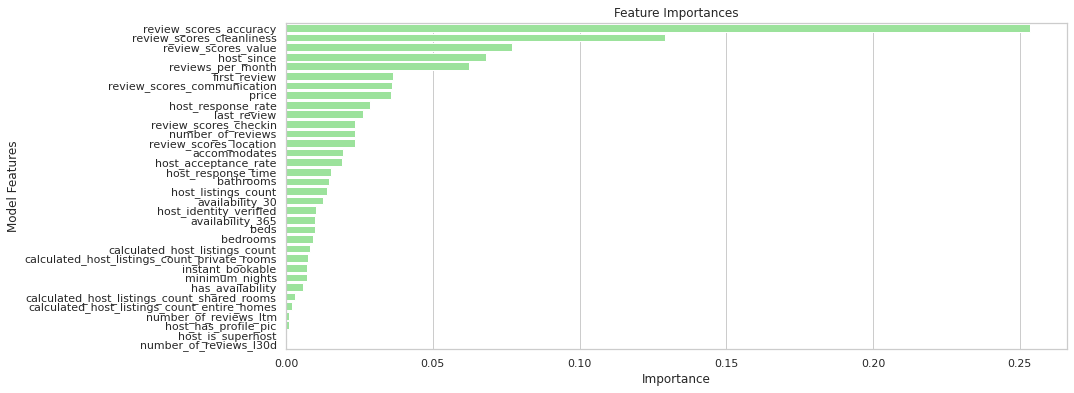

In [43]:
ftrs = pd.DataFrame(data = est_20.feature_importances_, index = X.columns, columns = ['importance'])
ftrs.sort_values('importance', ascending = False, inplace = True)
plt.figure(figsize = (14,6))
sns.barplot(data = ftrs, y = ftrs.index, x = 'importance', color = 'lightgreen')
plt.xlabel('Importance'); plt.ylabel('Model Features'); plt.title('Feature Importances'); plt.show()

# 5. Conclusion

The top 5 important features are Accuracy, Reviews per Month, Value, Length of Time as a Host, and Cleanliness.

### 5.1 Recommendations to Improve Rating

Accuracy: Hosts should be encouraged to be extremely accurate in their listing descriptions. <br />

Reviews per Month: Airbnb should encourage guests to leave reviews after their stay. <br />

Value: Hosts should consider the value their home provides when considering the price of the listing.<br />

Length of Time as a Host: While the length of time a host has hosted on Airbnb tends to positively affect the Rating, this is not a factor that can be improved for existing listings.<br />

Cleanliness: Hosts should be encouraged to ensure their home is cleaned for their guests.<br />